In [1]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
directory_to_dataset = r"E:\Datasets\dogs vs cats\small"

epochs = 20
learning_rate = 0.001
show_net_summary = False

In [3]:
train_directory = directory_to_dataset + r"\train"
test_directory = directory_to_dataset + r"\test"

train_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    fill_mode="nearest")

test_generator = ImageDataGenerator(rescale=1./255)

train_data = train_generator.flow_from_directory(train_directory, 
                                                 batch_size=20, 
                                                 target_size=(70, 70), 
                                                 class_mode='binary')
                                                 
test_data = test_generator.flow_from_directory(test_directory, 
                                               batch_size=20, 
                                               target_size=(70, 70), 
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
input_lay = Input((70,70,3))
x = Conv2D(32, 3, 1)(input_lay)
x = MaxPool2D(2)(x)
x = Dropout(0.2)(x)
x = Conv2D(64, 3, 1)(x)
x = MaxPool2D(2)(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_lay, output)

In [5]:
model.compile(optimizer=RMSprop(learning_rate=learning_rate), 
              loss="binary_crossentropy", 
              metrics="acc")

In [6]:
if show_net_summary:
    model.summary()

In [7]:
history = model.fit(train_data,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    epochs=epochs)

Epoch 1/20
100/100 [==============================] - 9s 72ms/step - loss: 0.8744 - acc: 0.5220 - val_loss: 0.6787 - val_acc: 0.5720
Epoch 2/20
100/100 [==============================] - 7s 70ms/step - loss: 0.7867 - acc: 0.5415 - val_loss: 0.7435 - val_acc: 0.5020
Epoch 3/20
100/100 [==============================] - 7s 71ms/step - loss: 0.6981 - acc: 0.5385 - val_loss: 0.6961 - val_acc: 0.5080
Epoch 4/20
100/100 [==============================] - 7s 70ms/step - loss: 0.6939 - acc: 0.5940 - val_loss: 0.6399 - val_acc: 0.6360
Epoch 5/20
100/100 [==============================] - 7s 69ms/step - loss: 0.6547 - acc: 0.6150 - val_loss: 0.6228 - val_acc: 0.6650
Epoch 6/20
100/100 [==============================] - 7s 71ms/step - loss: 0.6662 - acc: 0.6190 - val_loss: 0.6376 - val_acc: 0.6150
Epoch 7/20
100/100 [==============================] - 7s 71ms/step - loss: 0.6436 - acc: 0.6175 - val_loss: 0.6308 - val_acc: 0.6320
Epoch 8/20
100/100 [==============================] - 7s 72ms/step - 

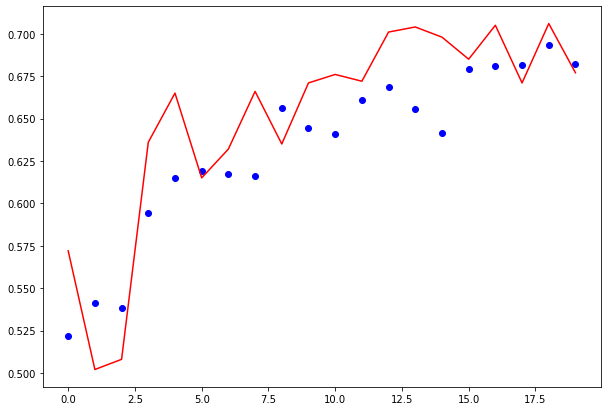

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(range(epochs), history.history["acc"], "bo")
plt.plot(range(epochs), history.history["val_acc"], "r")

